In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from numba import jit, prange, njit
from blimpy import Waterfall
import time
import random
import datetime
from synthetic_real_dynamic_edit import create_true, create_full_cadence, create_false, create_true_single_shot, create_true_faster
from scipy import spatial
from numpy import dot
from numpy.linalg import norm
import math
from sklearn.metrics import silhouette_score
import sys
sys.path.insert(1, '../ML_Training')
sys.path.insert(2, '../GBT_pipeline')
sys.path.insert(3, '../test_bench')
from preprocess_dynamic import get_data
from single_search import search_model_eval, combine
from skimage.transform import rescale, resize, downscale_local_mean
import gc
from keras.regularizers import l1, l2
from data_generation import create_data_set



plate = np.load('../../../../../../../datax/scratch/pma/real_filtered_LARGE_HIP110750.npy')[0:5000]

%matplotlib inline
NUM_SAMPLES = 200
data, false_data, true_data = create_data_set(plate, NUM_SAMPLES=NUM_SAMPLES, snr_base=20, snr_range = 10, factor=1)






Creating True
(200, 6, 16, 4096)
(200, 6, 16, 4096) (200, 6, 16, 512)
(200, 6, 16, 512)
(1200, 16, 512, 1)
Creating False
(1200, 6, 16, 4096) (1200, 6, 16, 512)
(1200, 6, 16, 512)
Creating True
(600, 6, 16, 4096) (600, 6, 16, 512)
(600, 6, 16, 512)
(600, 6, 16, 4096) (600, 6, 16, 512)
(600, 6, 16, 512)
(1200, 6, 16, 512, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


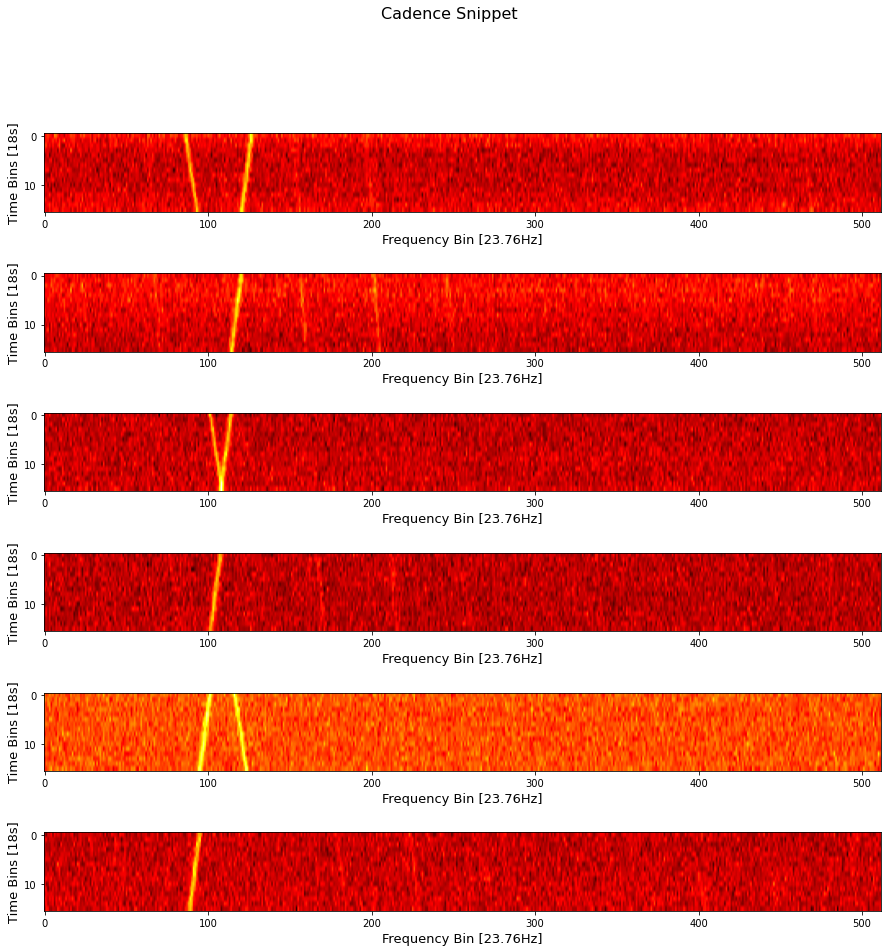

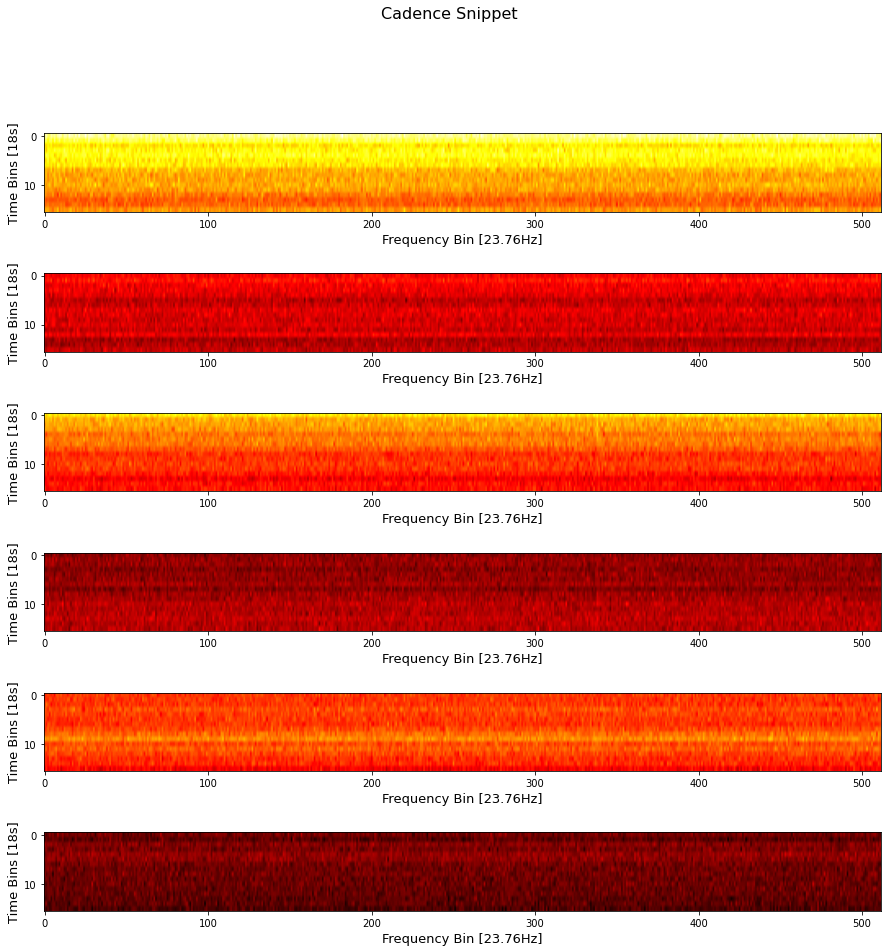

In [17]:
from random import random
def plot_cadence(data):
    fig, ax = plt.subplots(6, 1, figsize=(15,15))
    fig.suptitle('Cadence Snippet', fontsize=16)
    for i in range(6):
        ax[i].imshow(data[i,:,:], CMAP='hot',aspect=3, vmin = data.min(), vmax = data.max())
        ax[i].set_ylabel('Time Bins [18s]', fontsize=13)
        ax[i].set_xlabel('Frequency Bin [23.76Hz]', fontsize=13)
    plt.show()

index = int(random()*true_data.shape[0])
plot_cadence(true_data[index,:,:,:])
plot_cadence(false_data[index,:,:,:])

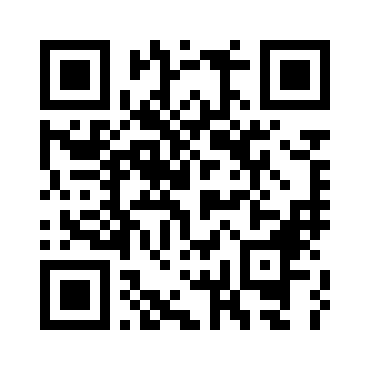

In [19]:
import qrcode
from PIL import Image

multi_paragraph = """
Leo Is the coolest intern I know 
"""


img = qrcode.make(multi_paragraph)
img.save("sample.png")
img.thumbnail((500, 500))
img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


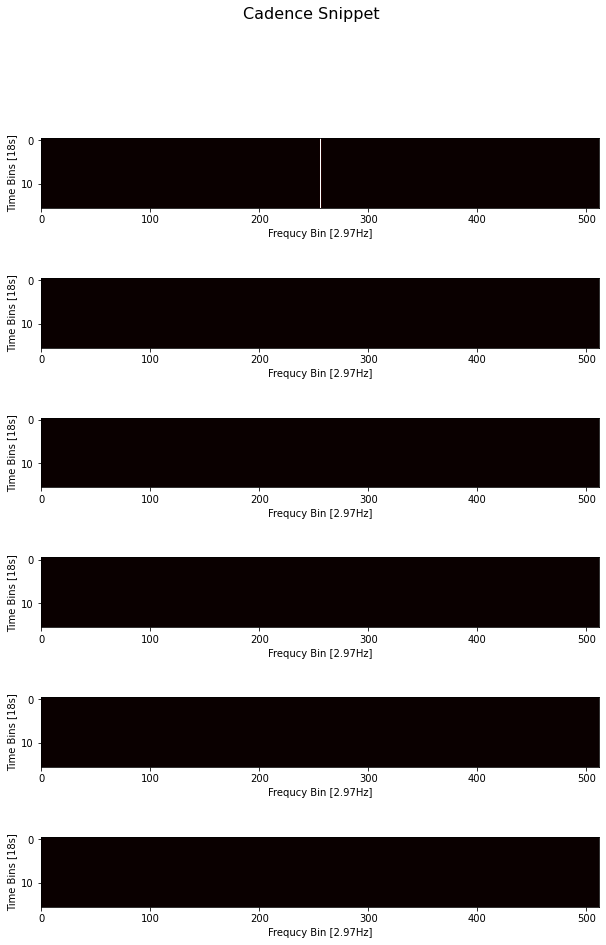

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
data = np.random.rand(1,6,16,512)

data[0,0,0:16,256] = 100000
def plot_cadence(data):
    fig, ax = plt.subplots(6, 1, figsize=(10,15))
    fig.suptitle('Cadence Snippet', fontsize=16)
    for i in range(6):
        ax[i].imshow(data[i,:,:], CMAP='hot',aspect=4, vmin = data.min(), vmax = data.max())
        ax[i].set_ylabel('Time Bins [18s]')
        ax[i].set_xlabel('Frequcy Bin [2.97Hz]')
    plt.show()

plot_cadence(data[0,:,:,:])

Defaulting to user installation because normal site-packages is not writeable
     |################################| 43 kB 118 kB/s eta 0:00:01
  Created wheel for qrcode: filename=qrcode-7.2-py3-none-any.whl size=39917 sha256=d4e0623fa04da28a55cf8776f71d3b2db47258281019112a9f8b5e4610f89c45
  Stored in directory: /mnt_home/pma/.cache/pip/wheels/f4/9a/66/dc2366ad5951cfca827c1fe82103e84d9c51df67ed0bc7979e
Successfully built qrcode
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import sys
sys.path.insert(1, '../GBT_pipeline')
sys.path.insert(2, '../ML_Training')
from synthetic_real_dynamic import create_true, create_full_cadence, create_false, create_true_single_shot, create_true_faster
import matplotlib.pyplot as plt
import numpy as np 
from single_search_RF import search
from execute_model import model_load
import tensorflow as tf
import pandas as pd
from preprocess_dynamic import resize_par
import gc 
from forest_primer import forest_primer
import joblib

NUM_SAMPLES = 100
WIDTH_BIN = 4096
freq_interval = 0


print("Load plate")
# plate = np.load('../../../../../../../datax/scratch/pma/real_filtered_LARGE_test_HIP15638.npy')
plate = np.load('../../../../../../../datax/scratch/pma/off_band_test/real_filtered_LARGE_test_'+str(freq_interval)+'_HIP15638.npy')

/home/pma/.local/lib/python3.6/site-packages/numba/core/decorators.py:255: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/pma/.local/lib/python3.6/site-packages/numba/core/decorators.py:255: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/pma/.local/lib/python3.6/site-packages/numba/core/decorators.py:255: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


Load plate


In [7]:
plate2 = np.load('../../../../../../../datax/scratch/pma/off_band_test/real_filtered_LARGE_test_'+str(10)+'_HIP15638.npy')
print()

In [2]:
FACTOR = 1
snr_range=5
snr_list = [20]
results = [] 
for snr in snr_list:
    print(snr)
    print("Creating False")
    false_data = abs(create_full_cadence(create_false, plate = plate, samples = NUM_SAMPLES, snr_base=snr, snr_range=snr_range, WIDTH_BIN=WIDTH_BIN))

    print("Creating True")
    true_data = create_full_cadence(create_true, plate = plate, samples = NUM_SAMPLES,  snr_base=snr, snr_range=snr_range, factor =FACTOR, WIDTH_BIN=WIDTH_BIN)

    print("Creating Single Shot True")
    true_single_shot= create_full_cadence(create_true_single_shot, plate = plate, samples = NUM_SAMPLES, snr_base=snr, snr_range=5, WIDTH_BIN=WIDTH_BIN)


20
Creating False
Creating True
Creating Single Shot True


In [3]:
print(false_data.shape)

(100, 6, 16, 4096)


(100, 6, 16, 4096) (100, 6, 16, 512)


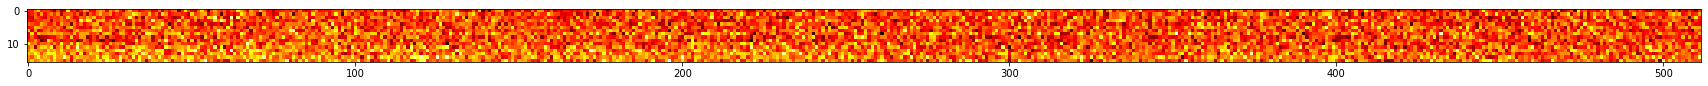

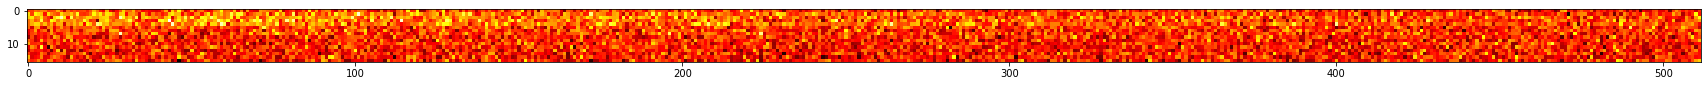

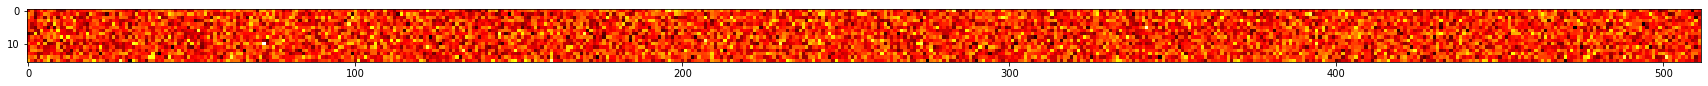

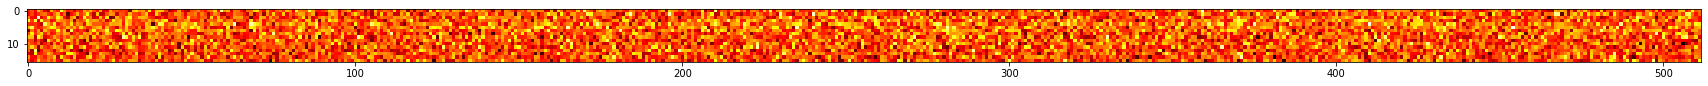

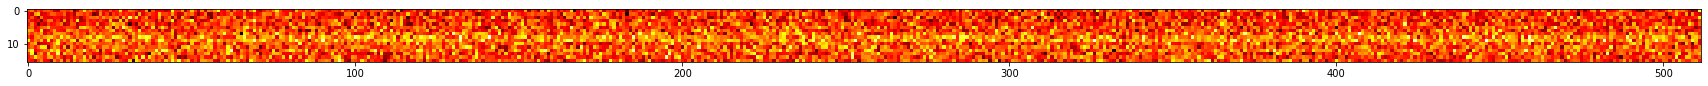

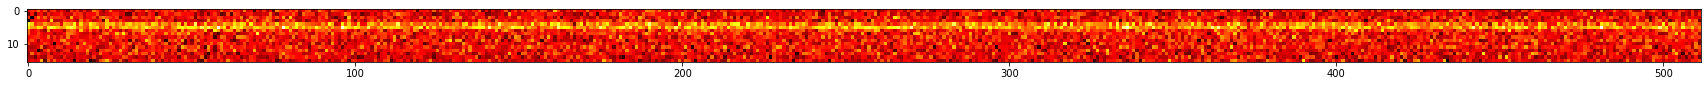

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_index= 10
resize = resize_par(false_data, factor=8)
for i in range(6):
    plt.figure(figsize=(30, 20))
    plt.imshow(resize[sample_index,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

26
(100, 6, 16, 4096) (100, 6, 16, 512)


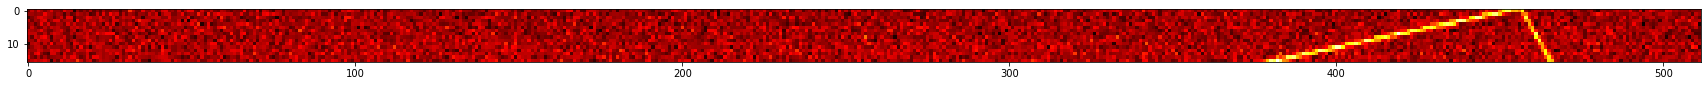

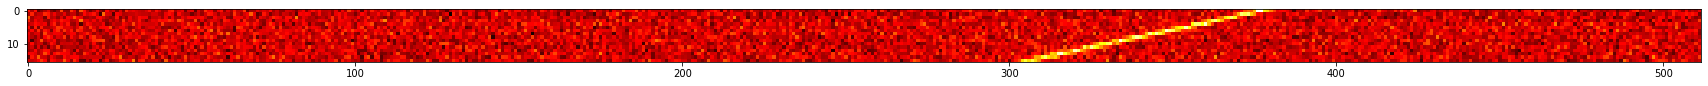

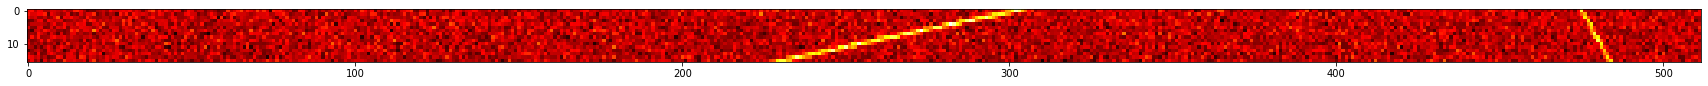

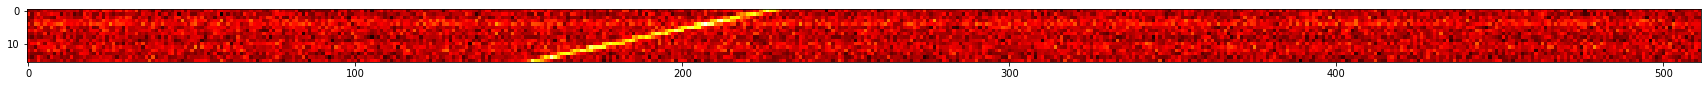

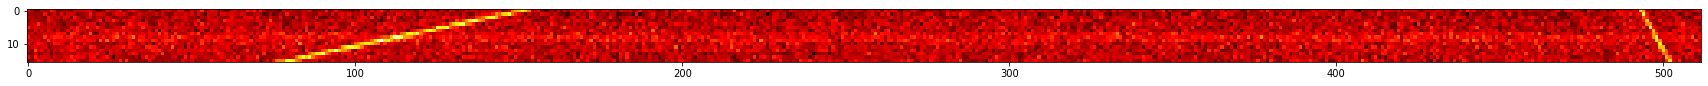

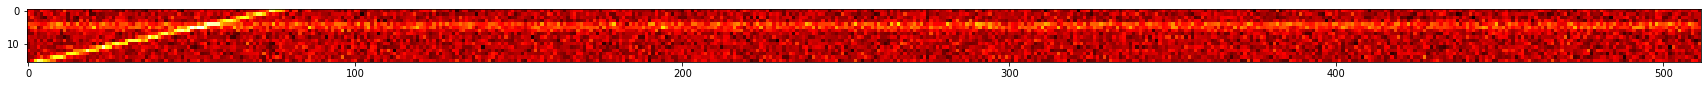

In [3]:
import matplotlib.pyplot as plt
from random import random
%matplotlib inline


sample_index= int(random()*100)
print(sample_index)
resize = resize_par(true_data, factor=8)
for i in range(6):
    plt.figure(figsize=(30, 20))
    plt.imshow(resize[sample_index,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

In [25]:
print(true_single_shot[sample_index,i,:,:].max())

12365365248.0


(16, 1, 4096)


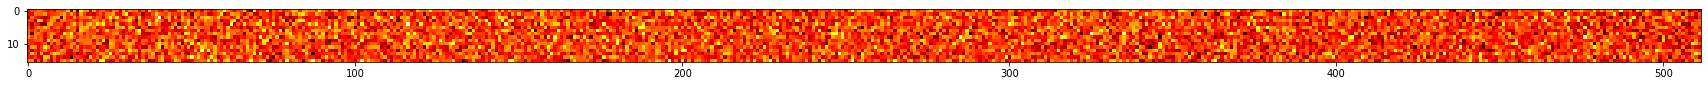

In [12]:
%matplotlib inline
from blimpy import Waterfall
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
1909.2887878417969
1909.3002319335938
obs = Waterfall('../../../../../../../mnt_blpd7/datax/dl/GBT_57627_55366_HIP35136_fine.h5', f_start = 1909.2887878417969
, f_stop =1909.3002319335938 ).data

# obs = Waterfall('../../../../../../../mnt_blpd7/datax/dl/GBT_57627_55366_HIP35136_fine.h5', f_start = 1836.8362426757812, f_stop =1836.8476867675781 ).data
print(obs.shape)
obs = downscale_local_mean(obs, ( 1,1, 8))
plt.figure(figsize=(30, 20))
plt.imshow(obs[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()

In [9]:
from blimpy import Waterfall
1836.8362426757812 1836.8476867675781
obs = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', f_start = 1041, f_stop =1042 ).info()
data = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', 
                                                 f_start=1042.8099632263184, f_stop=1042.8106784820557, max_load=5).data

print(data.shape)


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1926.26953125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        322961408
            nifs :                                1
     source_name :                        Hip110750
         src_dej :                    -19:29:22.025
         src_raj :                     22:26:13.676
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-09-23T05:10:15.000
    tstart (MJD) :                57654.21545138889
        za_start :                              0.0

Num ints in file :                               16
      File shape :               (16, 1, 32

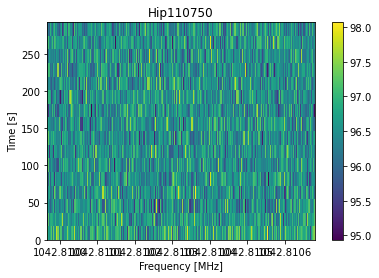

In [8]:
data = Waterfall('../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5', 
                    f_start=1042.8099632263184, f_stop=1042.8106784820557, 
                    max_load=5).plot_waterfall()


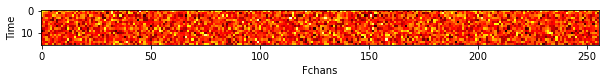

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow(data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()


In [17]:
import h5py
f = h5py.File('vae_best_model.hdf5', 'r')
print(list(f.keys()))
dset = f['encoder']
print(type(dset))
print(dset.name)

['decoder', 'encoder']
<class 'h5py._hl.group.Group'>
/encoder


In [15]:
import h5py
f = h5py.File('VAE-ENCODERv39.h5', 'r')
print(list(f.keys()))
type(f['model_weights'])

['model_weights']


h5py._hl.group.Group

In [209]:
from blimpy import Waterfall
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from random import random
%matplotlib inline

target_name = 'HIP53910'
df =pd.read_csv('../GBT_pipeline/result/'+target_name +'_directory.csv')
freq_frame = pd.read_csv('../GBT_pipeline/result/'+target_name +'.csv')
name = df['0'].tolist()
f_start_list = freq_frame['start_freq'].tolist()
f_end_list = freq_frame['end_freq'].tolist()
snr = freq_frame['SNR'].tolist()

data = []

30
1025.9835720062256
1025.9842872619631
2.178051233291626
1.5450822


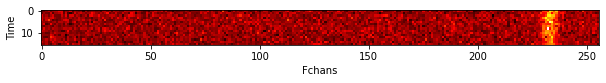

1.558411


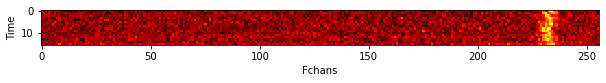

1.5992217


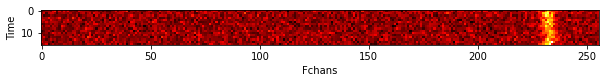

1.5934433


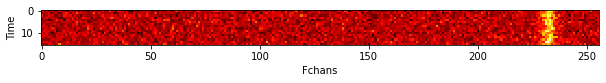

1.557467


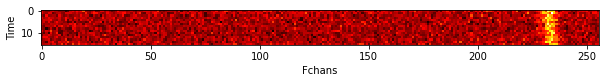

1.5350472


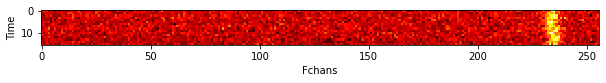

1308.3357810974119
1308.3364963531496
2.0221502780914307
1.2862791


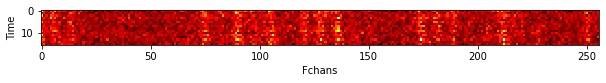

1.301105


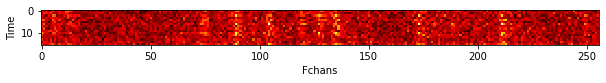

1.317777


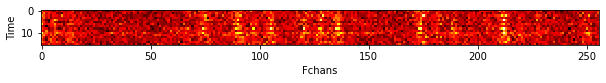

1.2197495


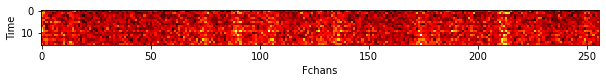

1.4260488


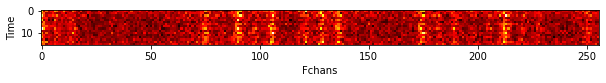

1.2458376


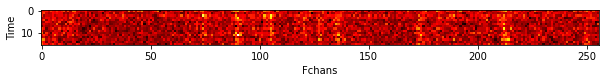

In [210]:
data = []
print(len(f_start_list))
for k in range(2):
    index= int(random()*len(f_start_list))
    f_start = f_start_list[index] 
    f_stop= f_end_list[index] 
    print(f_start)
    print(f_stop)
    print(snr[index])
    for i in range(6):
        dat = Waterfall(name[i], 
                              f_start=f_start, f_stop=f_stop).data
        temp = np.sum(dat[:,:,:], axis=0)
        print(temp[:,:].max()/np.mean(temp[:,:]))
        plt.figure(figsize=(10,4))
        plt.xlabel("Fchans")
        plt.ylabel("Time")
        plt.imshow(dat[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
        plt.show()

In [153]:
obs = Waterfall("../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5",f_stop = 1249.51171875, f_start =1023.92578125, max_load=20)

In [154]:
obs.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1926.26953125 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        322961408
            nifs :                                1
     source_name :                        Hip110750
         src_dej :                    -19:29:22.025
         src_raj :                     22:26:13.676
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-09-23T05:10:15.000
    tstart (MJD) :                57654.21545138889
        za_start :                              0.0

Num ints in file :                               16
      File shape :               (16, 1, 32

(16, 1, 256)


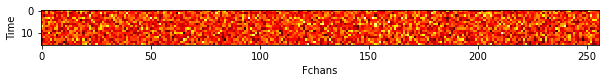

In [156]:
# n = int(80740352/256-10)
n= 10
data = obs.data[:,:,n*256 :(n+1)*256]
print(data.shape)
plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow(data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()

315392.0

In [160]:
WINDOW_SIZE = abs(256*-2.7939677238464355e-06)
print(1249.51171875 - (n+1)*WINDOW_SIZE)

1249.5038509368896


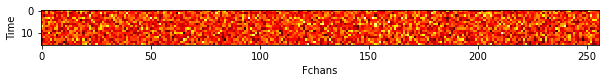

In [162]:
plt.figure(figsize=(10,4))
plt.xlabel("Fchans")
plt.ylabel("Time")
plt.imshow( Waterfall("../../../../../../../mnt_blpd7/datax2/dl/GBT_57654_18615_HIP110750_fine.h5",
                      f_start = 1249.5038509368896, f_stop= 1249.504566192627).data[:,0,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
plt.show()